In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from scipy import integrate
import seaborn as sns
from scipy.stats import mannwhitneyu
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [4]:
# Modules & functions

def func_mult(f, alpha, beta):
    """
    Tradeoff between ternary complex binding and mobility
        Parameters:
            f (real): fraction of ribosome-bound ternary complexes
            alpha (real): power law exponent of the bound TC fraction, see Eq. 12
            beta (real): power law exponent of the mobile TC fraction, equal to 1 (relative to alpha)
        Returns:
            fmod (real): weighted product of bound and freely-mobile TC states
    """
    fmod = (f**(alpha))*(1-f)**(beta)
    return fmod


$\textbf{FIGURE 7A}$: Plotting the probability distribution of the duration of ternary complex - ribosome binding events in limited-valency translation voxels at 3 dbl/hr, as a function of L7/L12 copy number $c$ (colors).

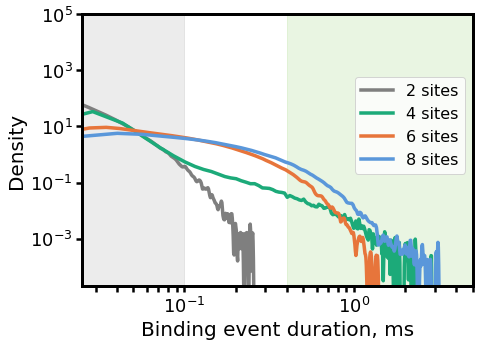

In [15]:
sigma = (13 + 5.8773)/0.72605 #nm
fig, ax = plt.subplots()

binwidth = 1
tscale = 0.0000005*4*0.0067723*100000   # s
binsall = np.arange(1,5000+binwidth,binwidth)
binscenters = np.array([0.5 * tscale * (binsall[i] + binsall[i+1]) for i in range(len(binsall)-1)])

colors_all = ['tab:gray','#1CAA79','#E7753B','#5A97DA']
labels = ['2 sites','4 sites','6 sites','8 sites']
nL7L12 = [2, 4, 6, 8]
tcut = 16 # TC 'bound' for > 16 timesteps (avg bound duration in the HS case, see FigS12), to account for rapid entropic unbinding & rebinding
avgvals = []

for m in range(0,4):       # n_L7L12
    n_val = nL7L12[m]
    search = np.genfromtxt('../Data/FIG7__L7L12CopyNumber/bind_t_rp{}.csv'.format(n_val), delimiter=",")
    mask = np.greater_equal(search, tcut)
    searchmask = search[mask]
    
    plot = sns.kdeplot(searchmask*tscale, shade=False, linewidth=3.5, c=colors_all[m], label=labels[m])
    height = np.interp(np.mean(searchmask), plot.lines[m].get_xdata(), plot.lines[m].get_ydata())
    
#####

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
ax.legend(prop={'size': 16},loc='upper right', bbox_to_anchor=(1.0,0.8))
ax.fill_between((1e-3,1e-1), 1e-6, 1e6, alpha=0.15, color='grey',zorder=0)
ax.fill_between((4e-1,10), 1e-6, 1e6, alpha=0.15, color='#70BF41',zorder=0)
for ax in fig.get_axes():
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(2e-5,1e5)
    ax.set_xlim(2.5e-2,5)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Binding event duration, ms',size=20)
    ax.set_ylabel('Density',size=20)
    ax.tick_params(axis='both', which='major', labelsize=18,width=2.5,length=6)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
        
fig.set_size_inches(7, 5)
plt.savefig('./images/Fig7A.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE 7B}$: Calculating and plotting the probability distributions of the fraction of the ternary complex population encountered by ribosomes, as a function of L7/L12 copy number $c$ (colors).

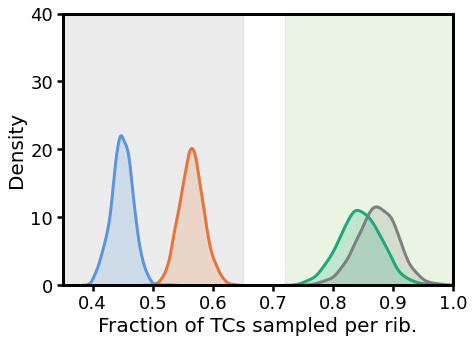

In [16]:
fig, ax = plt.subplots()

# Load Total Binding Data: gives the number of binding events for each unique TC and ribosome combo
rp_rib_tc = np.load('../Data/FIG7__L7L12CopyNumber/rp_rib_tc.npy')

# Find unique ribosomes and TCs found
n_rib = 1524 # number of ribosomes in a 3dbl/hr voxel
n_tc = 8820 # number of TC in a 3dbl/hr voxel
uni_rib = np.zeros((4,n_rib))
uni_tc = np.zeros((4,n_tc))
time_bound = []
for i,rp in enumerate(nL7L12):
    data = rp_rib_tc[i]
    found = np.array(np.where(data > tcut)).T
    _ur = np.zeros(n_rib)
    _ut = np.zeros(n_tc)
    for f in found:
        uni_rib[i,f[0]] += 1
        uni_tc[i,f[1]] += 1

binwidth = 1
binsall = np.arange(300.5,900.5+binwidth,binwidth)
binscenters = np.array([0.5 * (binsall[i] + binsall[i+1])/n_tc for i in range(len(binsall)-1)])
max_scale = np.max(uni_rib[0]) # maximum number of TC sampled in the c=2 case, used to normalize max to 1

for i,rp in enumerate(rps):
    plot = sns.kdeplot(uni_rib[i]/max_scale, shade=False, linewidth=3, c=colors_all[i], label=labels[i])
    height = np.interp(np.mean(uni_rib[i]/n_tc), plot.lines[i].get_xdata(), plot.lines[i].get_ydata())
    plot.fill_between(plot.lines[i].get_xdata(), 0, plot.lines[i].get_ydata(), alpha=0.2, color=colors_all[i])

ax.fill_between((0,0.65), 0, 50, alpha=0.15, color='grey',zorder=0) # #51A7F9
ax.fill_between((0.72,1.0), 0, 50, alpha=0.15, color='#70BF41',zorder=0)

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
ax.set_xlabel('Fraction of TCs sampled per rib.',size=20)
ax.set_ylabel('Density',size=20)
for ax in [ax]:
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=18,width=2.5,length=6)
ax.set_xlim(0.35,1)
ax.set_ylim(0,40)

fig.set_size_inches(7, 5)
plt.savefig('./images/Fig7B.png', bbox_inches='tight', dpi=300)

$\textbf{FIGURE 7C}$: Calculating and plotting the weighted product of ribosome-bound and freely mobile ternary complexes in limited-valency translation voxels at 3 dbl/hr, as a function of L7/L12 copy number ($c$).

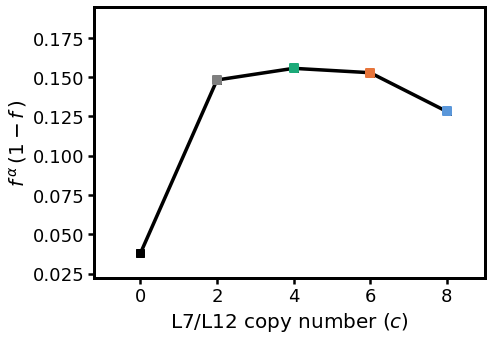

In [18]:
alpha = 1.71
beta = 1

fig, ax = plt.subplots()

#####

# isotropic simulation data
PercBound_TC_alleps_allphi = np.loadtxt('../Data/FIG4_5DE_S6_S7_S10_S11__FractionBound_Nc/PercBound_TC_alleps_allphi.txt')
PercBound_TC_eps0 = PercBound_TC_alleps_allphi[:,0]
# limited-valency (c = 4) 16kT simulation data
percbound_L7L12_alleps_gr1 = [0.5617205300000001, 0.704386525, 0.76036125, 0.7664794, 0.738820865]
# limited-valency (c = 2, 6, 8) 16kT simulation data
vals = [0.48, 0.75, 0.82]

# calculating weighted product of states
optperc_TC_eps0 = func_mult(PercBound_TC_eps0[-1], alpha, beta)
optperc_TC_eps16_patch = func_mult(percbound_L7L12_alleps_gr1[-1], alpha, beta)
optperc_TC_eps16_limval = [func_mult(a, alpha, beta) for a in vals]

# plotting
all_optperc = [optperc_TC_eps0, optperc_TC_eps16_limval[0], optperc_TC_eps16_patch, optperc_TC_eps16_limval[1], optperc_TC_eps16_limval[2]]
ax.plot([0] + nL7L12, all_optperc, color='k', zorder=10, linewidth=3.5, markersize=8, marker='s')
ax.scatter(nL7L12, all_optperc[1:], c=colors_all, s=65, marker='s', linewidth=2, zorder=100)

####

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
ax.set_xlabel('L7/L12 copy number ($c$)',size=20)
ax.set_ylabel(r'$f^{\, \alpha}\, (1-f\,)$',size=20)
for ax in [ax]:
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=18,width=2.5,length=6)
ax.set_xlim(-1.2,9)
# ax.set_ylim(0.12,0.17)
ax.set_ylim(0.022,0.195)

fig.set_size_inches(7, 5)
plt.savefig('./images/Fig7C.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE 7D}$: Calculating and plotting the probability distribution of minimal doubling times for three populations of bacteria, binned by L7/L12 copy number $c$.

Number of bacterial species per population: c = 4, N = 149
Number of bacterial species per population: c = 6, N = 182
Number of bacterial species per population: c = 8, N = 23
4-6, Mann-Whitney: statistic = 6213.5000, p-value = 2.253222820180675e-17
4-8, Mann-Whitney: statistic = 310.0000, p-value = 2.750636470627076e-10
6-8, Mann-Whitney: statistic = 968.0000, p-value = 2.7289422542632417e-05


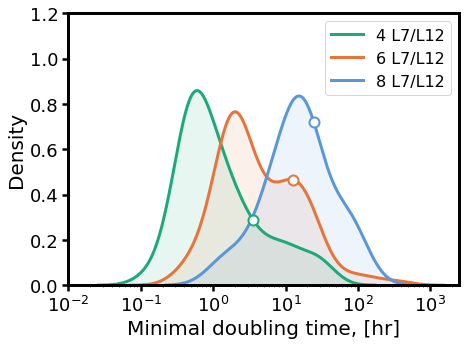

In [30]:
fig, ax = plt.subplots()
ax.set_xscale('log')
colors_all = ['#1CAA79','#E7753B','#5A97DA']
labels_new = ['4 L7/L12','6 L7/L12','8 L7/L12']

# Reading in data
all_l7l12 = np.genfromtxt('../Data/FIG7__L7L12CopyNumber/min_dbl.csv', delimiter=",")
all_l7l12 = all_l7l12[1:,:]
org_name = all_l7l12[:,0]
n_l7l12 = all_l7l12[:,3]
doubling_h = all_l7l12[:,4]
dict_all = {}

for i in range(0,3):
    # Binning minimal doubling times into three populations, based on L7/L12 copy number
    c_i = nL7L12[i+1]
    mask = np.logical_and(all_l7l12[:,3] == c_i, all_l7l12[:,3] == c_i)
    mask_i = all_l7l12[mask]
    print('Number of bacterial species per population: c = {}, N = {}'.format(c_i, np.size(mask_i[:,4])))
    dict_all[c_i] = mask_i
    
    # Plotting distribution
    plot_i = sns.kdeplot(mask_i[:,4], shade=False, linewidth=3, c=colors_all[i], label=labels_new[i])
    height_i = np.interp(np.mean(mask_i[:,4]), plot_i.lines[i].get_xdata(), plot_i.lines[i].get_ydata())
    plot_i.scatter(np.mean(mask_i[:,4]), height_i, c='w', s=100, marker='o', edgecolors=colors_all[i], linewidth=2, zorder=100)
    plot_i.fill_between(plot_i.lines[i].get_xdata(), 0, plot_i.lines[i].get_ydata(), alpha=0.1, color=colors_all[i])

# Calculating p-values via Mann-Whitney test
for i in range(0,2):
    c_i = nL7L12[i+1]
    dict_i = dict_all[c_i]
    for j in range(i+1,3):
        c_j = nL7L12[j+1]
        dict_j = dict_all[c_j]
        res = mannwhitneyu(dict_i[:,4], dict_j[:,4])
        print(f"{c_i}-{c_j}, Mann-Whitney: statistic = {res.statistic:.4f}, p-value = {res.pvalue:}")

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
ax.set_xlabel('Minimal doubling time, [hr]',size=20)
ax.set_ylabel('Density',size=20)
for ax in [ax]:
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=18,width=2.5,length=6)
ax.set_xlim(1e-2,2.5e3)
ax.set_ylim(0,1.2)
ax.legend(prop={'size': 16},loc='upper right')

fig.set_size_inches(7, 5)
plt.savefig('./images/Fig7D.png', bbox_inches='tight', dpi=300)
